In [42]:
from skimage.io import imread
import os
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
train_images = []
train_masks = []
root = './data/nuclei/train'
for subdir in os.listdir(root):
    subfolder = os.path.join(root,subdir)
    if os.path.isdir(subfolder):
        #print(subdir)
        for subsubfolder_name in os.listdir(subfolder):
            if subsubfolder_name == 'images':
                for _,_,files in os.walk(os.path.join(subfolder,subsubfolder_name)):
                    for file in files:
                        if file.endswith('.png'):
                            train_images.append(imread(os.path.join(subfolder,subsubfolder_name,file)))
            if subsubfolder_name == 'masks':
                for _,_,files in os.walk(os.path.join(subfolder,subsubfolder_name)):
                    masks = []
                    for file in files:
                        if file.endswith('.png'):
                            masks.append(imread(os.path.join(subfolder,subsubfolder_name,file)))
                    train_masks.append(masks)


## Note:
1. from print, we know that train images are not the same size, 4 channels-rgb+alpha. 
2. mask images are the same size as train images.

## TODO：
1. let's firstly try the simplest solution, resize them all to 256x256; ** done **
2. mask could be summed together; **done**
2. better solution could be crop 256x256 from images;

In [ ]:
print("there are %d train images"%(len(train_images)))
# for image in train_images:
#     print(image.shape)

size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True) for x in train_images]
X = np.array(X, np.float32)
X = X[:,:,:,:-1]# we don't need this alpha channel, right?

# thresholding to get the mask
Y = np.zeros([len(train_images),X.shape[1],X.shape[2]])
k = 0
for masks in train_masks:
    ys = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in masks]
    ys = np.array(ys, np.float32)
    ys = ys.sum(axis=0)
    Y[k] = ys
    k += 1

there are 670 train images


(670, 256, 256, 2)


TypeError: Invalid shape (256, 256, 2) for image data

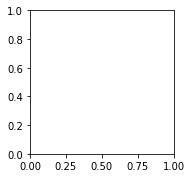

In [47]:
plt.rcParams['figure.figsize'] = [18, 6]

print(X.shape)

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.imshow(X[i])

    plt.subplot(2, 6, i+7)
    plt.imshow(Y[i])
#     print(Y[i][Y[i] == 1])
#     break
plt.show()

In [40]:
a = np.array([2,2,2],np.float32)
print(a)

[2. 2. 2.]
